<a href="https://colab.research.google.com/github/badgiojuni/DL_with_pytorch/blob/main/TrainingNNOnGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
image, label = dataset[0]
print(image[0,:,:].shape, torch.tensor(label).shape)

torch.Size([28, 28]) torch.Size([])


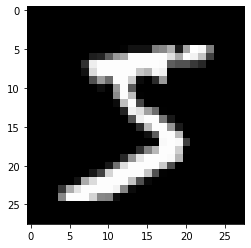

In [5]:
plt.imshow(image[0,:,: ],cmap='gray')

In [6]:
val_size = 10000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [10]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size = batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size = batch_size*2,num_workers=2, pin_memory=True)

In [12]:
for images, _ in train_loader:
  print(make_grid(images, nrow=16).shape)
  break

torch.Size([3, 242, 482])


images.shape:  torch.Size([128, 1, 28, 28]) images_type:  <class 'torch.Tensor'>


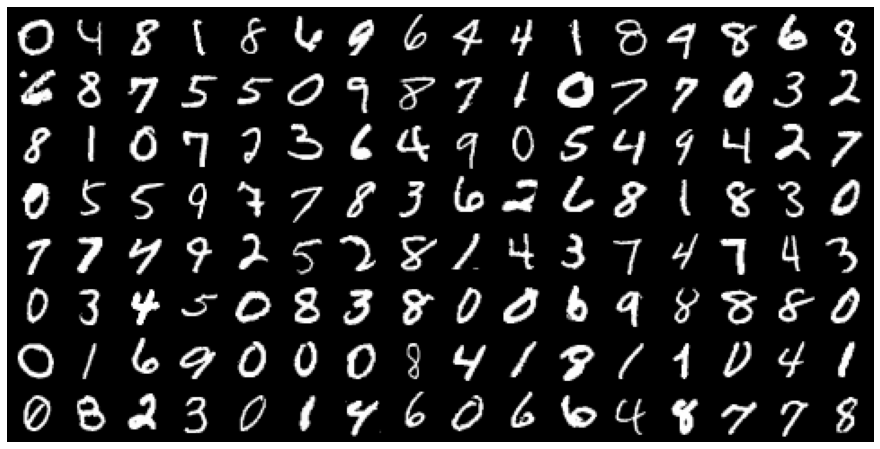

In [14]:
for images, _ in train_loader:
  print("images.shape: ", images.shape, "images_type: ", type(images))
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break